# Credit Card Fraud Detection: Data Exploration and Analysis
This notebook provides an in-depth exploratory data analysis (EDA) of the credit card fraud detection dataset. The goal is to extract meaningful insights from the data, identify patterns in fraudulent transactions, and prepare the groundwork for modeling. The dataset is highly imbalanced and consists of anonymized features resulting from a PCA transformation.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Required libraries
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.feature_selection import mutual_info_classif
from sklearn.manifold import TSNE

In [2]:
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

In [3]:
# Load dataset
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Dataset Summary
The dataset contains 284,807 transactions with 30 input features and a binary target class label:
- Features V1 through V28 are results of PCA transformation and are anonymized.
- 'Time' is the seconds elapsed between this transaction and the first transaction in the dataset.
- 'Amount' is the transaction amount.
- 'Class' is the response variable, where 1 indicates fraud and 0 indicates a legitimate transaction.

In [4]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Class Distribution Analysis
Given the nature of the problem, it is expected that fraudulent transactions are significantly fewer than legitimate ones. Analyzing class imbalance is crucial as it affects the choice of evaluation metrics and modeling strategy.

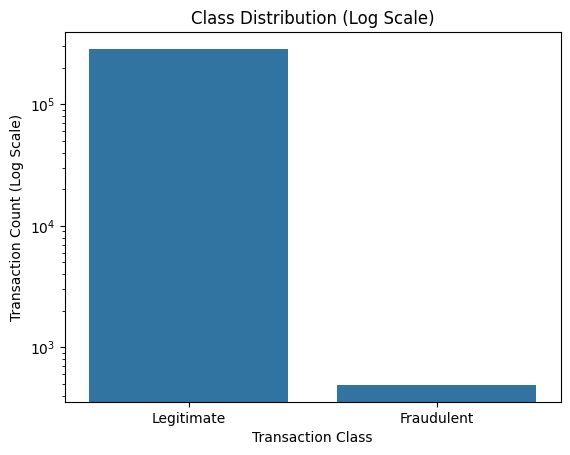

In [6]:
sns.countplot(x='Class', data=df)
plt.yscale('log')
plt.title('Class Distribution (Log Scale)')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.xlabel('Transaction Class')
plt.ylabel('Transaction Count (Log Scale)')
plt.show()

In [7]:
df['Class'].value_counts(normalize=True) * 100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

## Transaction Amount Distribution
This section explores the distribution of transaction amounts. Since this feature is not PCA-transformed, its raw distribution may offer insights into whether fraudulent transactions tend to be low or high in value.

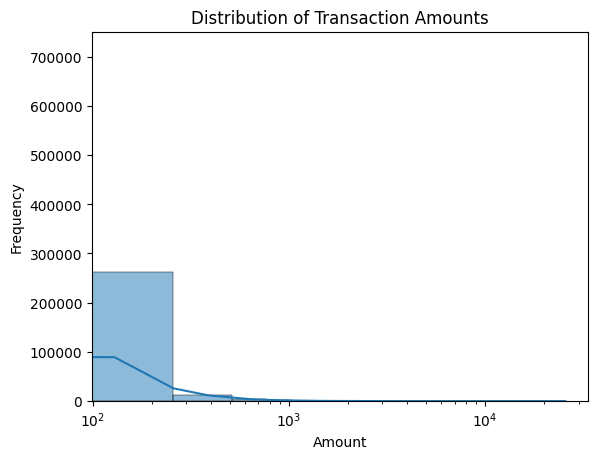

In [8]:
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

## Hour of Transaction
This section investigates whether the time of transaction (binned by hour) has any influence on the likelihood of fraud. 'Time' is converted to hours and plotted by class.

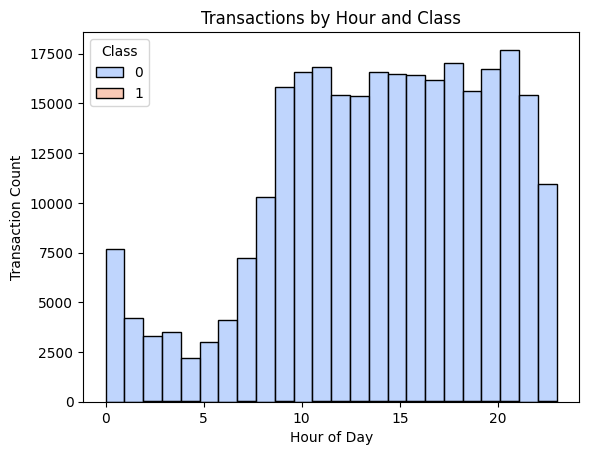

In [9]:
df['Hour'] = (df['Time'] // 3600) % 24
sns.histplot(data=df, x='Hour', hue='Class', bins=24, multiple='stack', palette='coolwarm')
plt.title('Transactions by Hour and Class')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.show()

## Correlation Analysis
The correlation matrix is used to determine how features relate to the target class. A diverging heatmap is used to visually assess which features are most indicative of fraudulent activity.

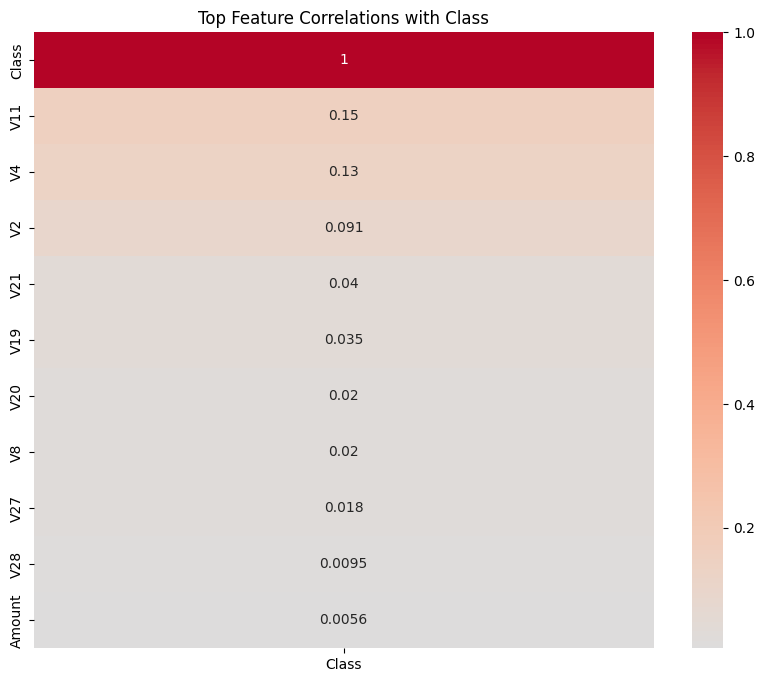

In [10]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix[['Class']].sort_values(by='Class', ascending=False).head(11), annot=True, cmap='coolwarm', center=0)
plt.title('Top Feature Correlations with Class')
plt.show()

## KDE Plots for Key Features
Kernel Density Estimation (KDE) plots are used to understand how selected features differ between legitimate and fraudulent transactions. Features with high correlation to the target class are analyzed.

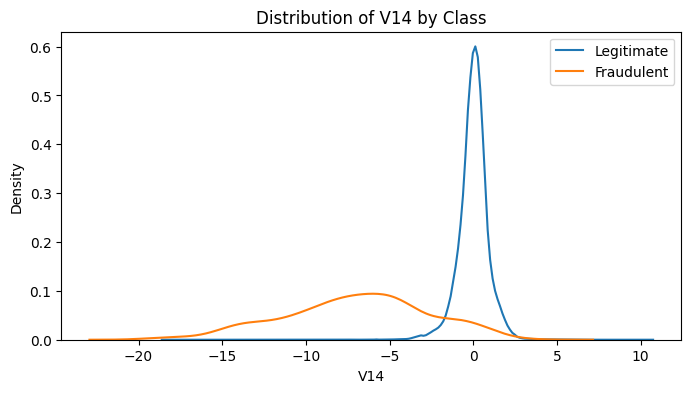

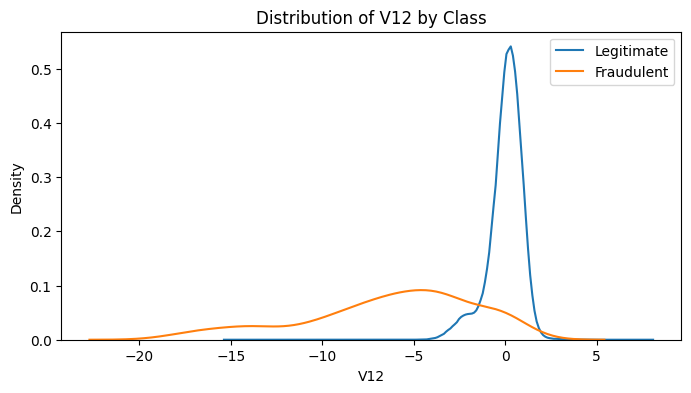

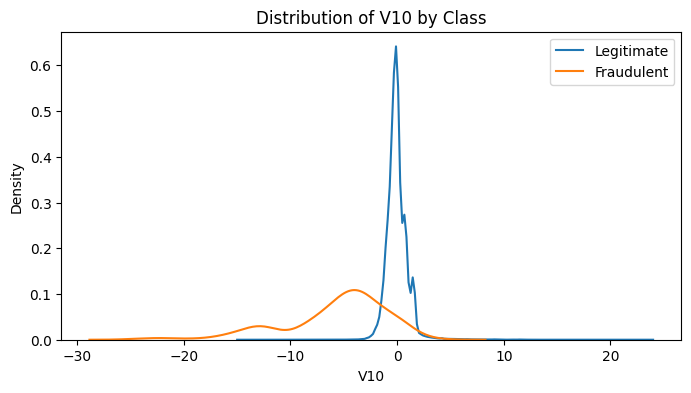

In [11]:
for feature in ['V14', 'V12', 'V10']:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[df['Class'] == 0][feature], label='Legitimate')
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraudulent')
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.legend()
    plt.show()

## Balanced Sampling for Visualization
To visualize features effectively, we construct a balanced subset using all fraud samples and a random sample of legitimate transactions. This subset is only used for plotting.

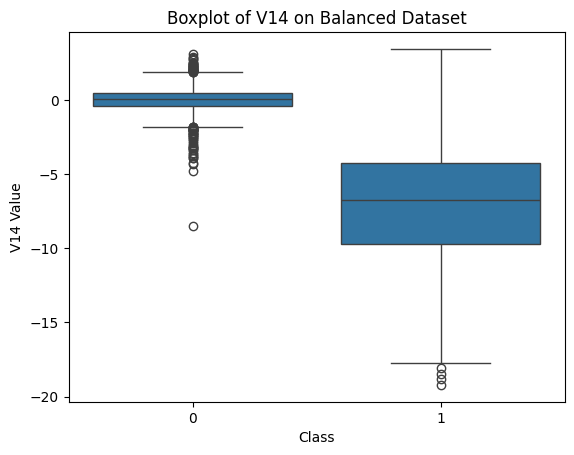

In [12]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=len(fraud) * 3, random_state=42)
balanced_df = pd.concat([fraud, non_fraud])
sns.boxplot(data=balanced_df, x='Class', y='V14')
plt.title('Boxplot of V14 on Balanced Dataset')
plt.xlabel('Class')
plt.ylabel('V14 Value')
plt.show()

## Mutual Information Analysis
Mutual information measures the dependency between each feature and the target class. Unlike correlation, it can capture non-linear relationships.

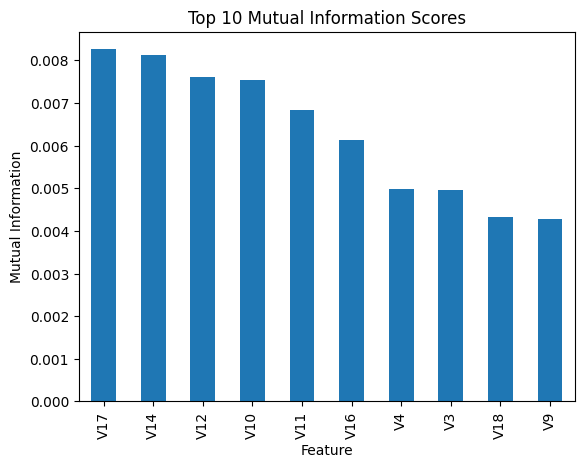

In [13]:
X = df.drop(columns=['Class', 'Time'])
y = df['Class']
mi = mutual_info_classif(X, y, discrete_features=False, random_state=0)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi_series.head(10).plot(kind='bar', title='Top 10 Mutual Information Scores')
plt.xlabel('Feature')
plt.ylabel('Mutual Information')
plt.show()

## Outlier Detection Using Z-Score
Fraudulent transactions often deviate significantly from the norm. Z-score is used to measure how many standard deviations a data point is from the mean. A composite outlier score is calculated across top features.

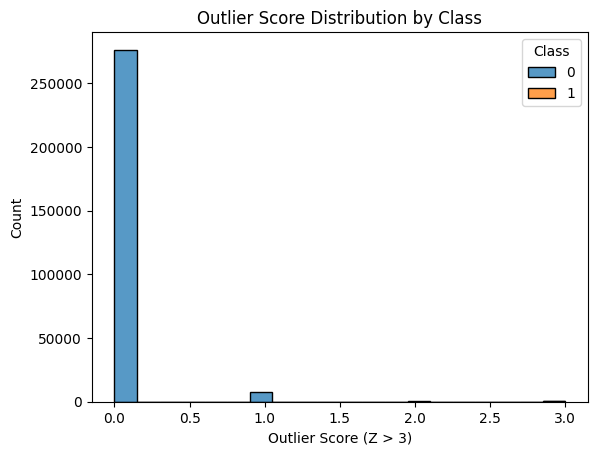

In [14]:
z_scores = np.abs(zscore(df[['V14', 'V12', 'V10']]))
df['OutlierScore'] = (z_scores > 3).sum(axis=1)
sns.histplot(data=df, x='OutlierScore', hue='Class', multiple='stack')
plt.title('Outlier Score Distribution by Class')
plt.xlabel('Outlier Score (Z > 3)')
plt.ylabel('Count')
plt.show()

## t-SNE Projection for Class Separation
T-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensionality reduction technique used to visualize high-dimensional data in 2D. This section evaluates whether fraudulent transactions form visually separable clusters.

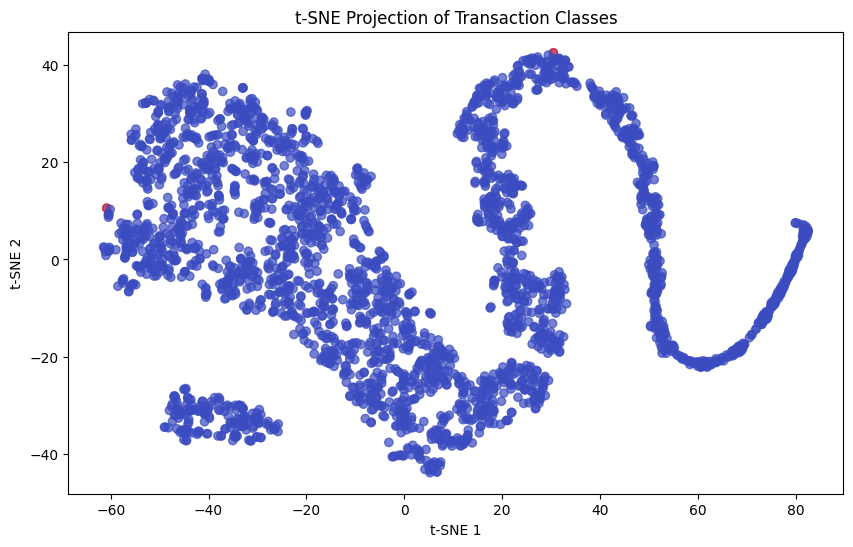

In [15]:
sample_df = df.sample(3000, random_state=1)
X_sample = sample_df.drop(columns=['Class', 'Time'])
y_sample = sample_df['Class']
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_sample)
plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_sample, cmap='coolwarm', alpha=0.7)
plt.title('t-SNE Projection of Transaction Classes')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

## Conclusion
1. The dataset is extremely imbalanced, with fraudulent transactions comprising less than 0.2%.
2. Features V14, V12, and V10 show strong predictive power for identifying fraud.
3. KDE and box-plots suggest clear distributional differences in top features between classes.
4. Time of transaction may influence the fraud likelihood, with noticeable class imbalance during certain hours.
5. Outlier scores and mutual information reinforce the uniqueness of fraudulent transactions.
6. Dimensionality reduction with t-SNE indicates some degree of separability between fraud and non-fraud.

This analysis lays a strong foundation for downstream tasks such as preprocessing, modeling, and evaluation.